## HW8

Consider the following example with 7 states: 

F - A - B - C - D - E - S

Here, F and S corresponds to the terminal states. On each state, we can choose either to move to the left, or move to the right. Rewards is 0 if we move from E to S and -1 otherwise. The initial location is given by state C, in the middle. 

* You will apply the REINFORCE algorithm (P25, Lecture 8) to this example to compute an optimal policy. Specifically, since the action is binary, we consider using Example 3 to parametrize (P22, Lecture 8) the policy class. The feature function $\phi(s)$ can be set to a table lookup function, e.g., $\phi(s)=[I(s=s_1), I(s=s_2), \cdots, I(s=s_7)]$ where $(s_1,\cdots,s_7)$ corresponds to the state space. You may fix the step size $\alpha$ to 0.1. 

* Consider generating 1000 episodes to learn the optimal policy. In each episode, compute the return. This yields a total of 1000 returns. Repeat this procedure 100 times and compute the average return for each episode, aggregated over 100 replications. 

* As we have discussed in the lecture, the expected value of the policy score is equal to zero. As such, we can add a baseline term to the return $G_t$ to reduce the variance of the gradient. Under the current setting, the return is at most $-2$. We may replace $G_t$ in the REINFORCE algorithm with $G_t+2$. The resulting gradient is expected to have a smaller variance. Repeat the procedure in Step 2 for this algorithm and compute the average return for each of the 1000 episodes. 

* Plot the 2000 average returns obtained in Steps 2 and 3. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Agent:
    def __init__(self, init_s):
        self.init = init_s
        self.s = init_s
        self.phi_s = np.array([0 for s in S])
        self.phi_s[init_s] = 1
        self.r = 0
        self.done = False
        
        
    # Policy approximator
    def policy(self, theta):
        p = log_func(np.dot(self.phi_s, theta))
        if np.random.random() <= p:
            return 1
        else:
            return 0

    # Performs a step of the agent
    def step(self, a):
        self.phi_s[self.s] = 0
        self.r = -1
        self.done = False
        
        if a == 1 and self.s == 5:
            self.r = 0
            self.s = 6
            self.done = True
        elif self.s == 1 and a == 0:
            self.s = 0
            self.done = True
        elif a == 1:
            self.s = self.s + 1
        elif a == 0:
            self.s = self.s - 1

        self.phi_s[self.s] = 1
        return self.s, self.r, self.done
    
    def reset(self):
        self.s = self.init
        self.phi_s = np.array([0 for s in S])
        self.phi_s[self.init] = 1
        self.r = 0.0
        self.done = False
        return self.s

# Logistic function
def log_func(x):
    num = (1 + np.exp(-x))**(-1)
    return num
    
# Policy score
def policy_score(s, a, theta):
    phi_s = np.array([0 for s in S])
    phi_s[s] = 1
    p = log_func(np.dot(phi_s, theta))
    gradient_vec = (a - p) * phi_s
    
    return gradient_vec

In [3]:
# Initialisation
alpha = 0.1
S = ['F', 'A', 'B', 'C', 'D', 'E', 'S']

### Step 2
Consider generating 1000 episodes to learn the optimal policy. In each episode, compute the return. This yields a total of 1000 returns. Repeat this procedure 100 times and compute the average return for each episode, aggregated over 100 replications. 

In [4]:
episodes = 1000
iterations = 100
R_tot = {}
env = Agent(3)
for it in range(iterations):
    theta = np.array([0 for s in S])
    for ep in range(episodes):  
        state = env.reset()  
        done = False  
        D = []
    
        while not done:
            a = env.policy(theta)
            next_state, r, done = env.step(a)
            D.append([state, a, r])
            state = next_state
    
        counter = 0
        for s, a, r in D:
            G = sum(D[t][2] for t in range(counter, len(D)))
            theta = theta + alpha * policy_score(s, a, theta) * G
            counter += 1
        R_tot[it, ep] = sum(D[t][2] for t in range(0, len(D)))

# Aggregated average
G_aggregated = []
for ep in range(episodes):
    G_aggregated.append(sum(R_tot[it, ep] for it in range(100))/100)

### Step 3
As we have discussed in the lecture, the expected value of the policy score is equal to zero. As such, we can add a baseline term to the return $G_t$ to reduce the variance of the gradient. Under the current setting, the return is at most $-2$. We may replace $G_t$ in the REINFORCE algorithm with $G_t+2$. The resulting gradient is expected to have a smaller variance. Repeat the procedure in Step 2 for this algorithm and compute the average return for each of the 1000 episodes. 

In [5]:
episodes = 1000
iterations = 100
R_tot = {}
baseline = 2
env = Agent(3)
for it in range(iterations):
    theta = np.array([0 for s in S])
    for ep in range(episodes):  
        state = env.reset()  
        done = False  
        D = []
    
        while not done:
            a = env.policy(theta)
            next_state, r, done = env.step(a)
            D.append([state, a, r])
            state = next_state
    
        counter = 0
        for s, a, r in D:
            G = sum(D[t][2] for t in range(counter, len(D))) + baseline
            theta = theta + alpha * policy_score(s, a, theta) * G
            counter += 1
        R_tot[it, ep] = sum(D[t][2] for t in range(0, len(D)))
        
# Aggregated average
G_aggregated2 = []
for ep in range(episodes):
    G_aggregated2.append(sum(R_tot[it, ep] for it in range(100))/100)

* Plot the 2000 average returns obtained in Steps 2 and 3. 

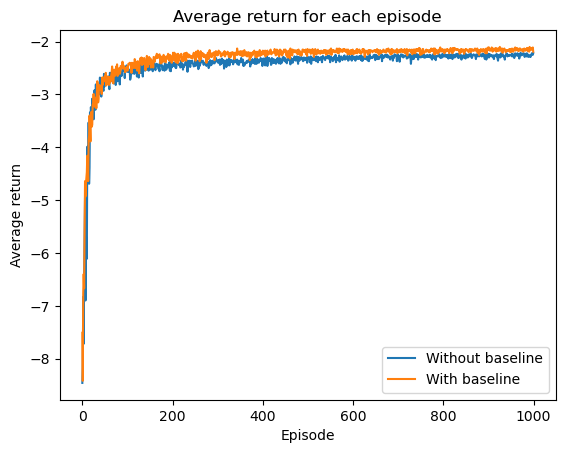

In [8]:
plt.plot(G_aggregated, label = 'Without baseline')
plt.plot(G_aggregated2, label = 'With baseline')
plt.xlabel('Episode')
plt.ylabel('Average return')
plt.title('Average return for each episode')
plt.legend()
plt.show()